# **Linear Regression using Scikit Learn**
In this section we will see how the Python Scikit-Learn library for machine learning can be used to implement regression functions. We will start with simple linear regression involving two variables.

## **Simple Linear Regression**

In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

**Importing required libraries:**

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
%matplotlib inline

**Loading Data from URL:**

In [57]:
url = 'http://bit.ly/w-data'
student_data = pd.read_csv(url)
print("Data loaded successfully")

Data loaded successfully


**Checking data information:**

In [58]:
student_data.shape

(25, 2)

In [59]:
student_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [60]:
student_data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [61]:
student_data.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


**Basic EDA on Data:**

In [62]:
student_data.isna().sum()

Hours     0
Scores    0
dtype: int64

In [63]:
student_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


**Data visualization using matpololib and seaborn libraries:**

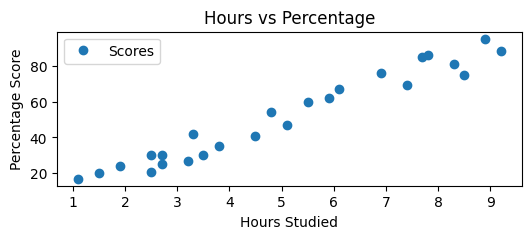

In [64]:
student_data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')
plt.rcParams["figure.figsize"] = [6, 2]  
plt.show()

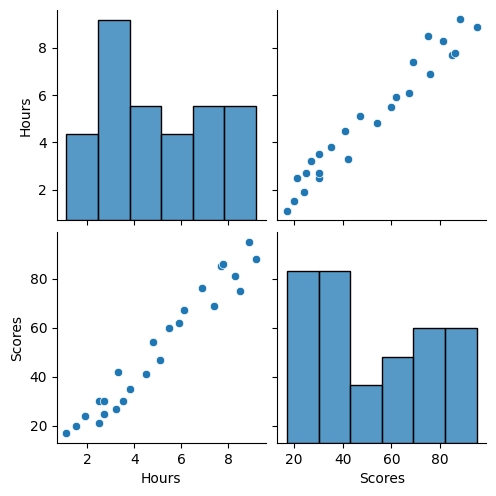

In [65]:
sns.pairplot(student_data)
plt.show()

From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.

# Data preparation

The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [117]:
x = student_data.iloc[:, :-1].values  
y = student_data.iloc[:, 1].values  

Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method.

In [118]:
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                            test_size=0.2, random_state=2) 

# Model training
Train model using splited data.

In [119]:
regressor = LinearRegression()  
regressor.fit(x_train, y_train) 

print("Training complete.")

Training complete.


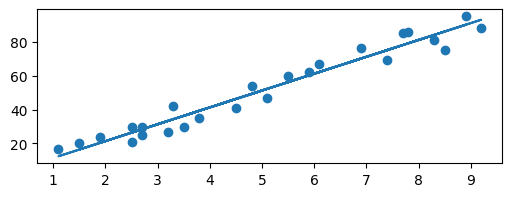

In [120]:
# Plotting the regression line
line = regressor.coef_*x+regressor.intercept_

# Plotting for the test data
plt.scatter(x, y)
plt.plot(x, line);
plt.show()

# Making prediction with test data
Now that we have trained our algorithm, it's time to make some predictions.

In [121]:
y_pred = regressor.predict(x_test) # Predicting the scores

In [122]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,17,12.442587
1,21,26.359448
2,24,20.395079
3,88,92.961570
4,76,70.098155


<Axes: title={'center': 'Comaparison between Actual and Predicted Score Values'}>

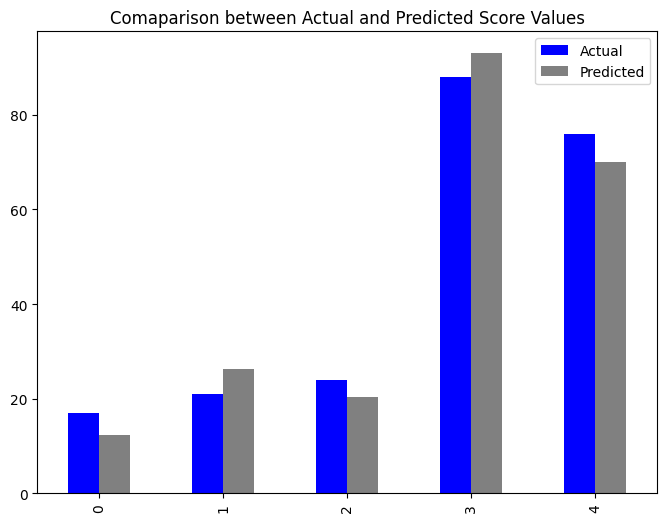

In [123]:
df.plot(kind='bar',figsize=(8,6), color=["blue", "grey"], title= "Comaparison between Actual and Predicted Score Values")

Now predict with own random data:

In [147]:
hours = [[9.25]]
own_pred = regressor.predict(hours)
print(f'If a student studies 9.25 hours/day then the score will be: {own_pred[0]}')

If a student studies 9.25 hours/day then the score will be: 93.45860055685799


# Evaluating the model
The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [148]:
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.877039354964476
